<a href="https://colab.research.google.com/github/SirDripset/HHA-507/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df1 = pd.read_csv('/ds1 (1).csv')

In [4]:
df1

Unnamed: 0        x1        x2        x3        x5        x6  \
0               1  2.642583 -1.715220  1.909334  0.027139 -3.447187   
1               2  4.588761 -2.507543  4.239107  1.704150 -2.782809   
2               3  7.919796 -5.108415  3.039451  0.992815  5.551587   
3               4  2.616757 -2.124040  2.855570  0.990079  1.694697   
4               5  3.300856 -5.159684  0.764544  0.143581  3.277496   
...           ...       ...       ...       ...       ...       ...   
99995       99996  4.385227 -4.536328  2.830926  2.292516  4.431597   
99996       99997  0.972447 -4.508355  0.072768  0.595734  0.335094   
99997       99998  6.490640 -1.866173  1.850645  0.456275 -5.556419   
99998       99999  7.167485 -1.981598  4.119294  0.520821  2.510750   
99999      100000  9.758491 -2.654220  3.603740  0.392868  0.010298   

              ya        yb        yc  
0      13.630850  1.828765  0.008386  
1       7.834582  2.162110  0.000008  
2      -5.107041  2.797083 -0.000005  
3      19.015046  1.953887  0.038017  
4      -9.818862  1.922446  0.001178  
...          ...       ...       ...  
99995   6.583471  2.379759  0.023312  
99996 -36.866746  0.527708 -0.096336  
99997   7.428092  2.404794 -0.002917  
99998  21.136472  2.735631  0.000199  
99999  14.383476  2.996599 -0.002061  

[100000 rows x 9 columns]

In [5]:
df1 = df1.drop(columns=['Unnamed: 0'], axis =1)

In [6]:
df1

x1        x2        x3        x5        x6         ya        yb  \
0      2.642583 -1.715220  1.909334  0.027139 -3.447187  13.630850  1.828765   
1      4.588761 -2.507543  4.239107  1.704150 -2.782809   7.834582  2.162110   
2      7.919796 -5.108415  3.039451  0.992815  5.551587  -5.107041  2.797083   
3      2.616757 -2.124040  2.855570  0.990079  1.694697  19.015046  1.953887   
4      3.300856 -5.159684  0.764544  0.143581  3.277496  -9.818862  1.922446   
...         ...       ...       ...       ...       ...        ...       ...   
99995  4.385227 -4.536328  2.830926  2.292516  4.431597   6.583471  2.379759   
99996  0.972447 -4.508355  0.072768  0.595734  0.335094 -36.866746  0.527708   
99997  6.490640 -1.866173  1.850645  0.456275 -5.556419   7.428092  2.404794   
99998  7.167485 -1.981598  4.119294  0.520821  2.510750  21.136472  2.735631   
99999  9.758491 -2.654220  3.603740  0.392868  0.010298  14.383476  2.996599   

             yc  
0      0.008386  
1      0.000008  
2     -0.000005  
3      0.038017  
4      0.001178  
...         ...  
99995  0.023312  
99996 -0.096336  
99997 -0.002917  
99998  0.000199  
99999 -0.002061  

[100000 rows x 8 columns]

In [7]:
#CHECK NULL VALUES
df1.isnull().sum()

x1    0
x2    0
x3    0
x5    0
x6    0
ya    0
yb    0
yc    0
dtype: int64

In [8]:
df1.describe()

x1             x2             x3             x5  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        5.011059      -3.005565       2.500593       0.999136   
std         2.873568       2.000799       1.752906       1.002006   
min         0.000015     -12.498524      -3.489212       0.000003   
25%         2.536309      -4.353844       1.189920       0.285629   
50%         5.022191      -3.002649       2.503764       0.690903   
75%         7.486275      -1.649283       3.802236       1.386862   
max         9.999887       6.089820       8.679097      15.102966   

                  x6             ya             yb            yc  
count  100000.000000  100000.000000  100000.000000  1.000000e+05  
mean        0.000647       3.827867       2.111854  1.022765e-04  
std         4.663860      18.438514       0.769306  3.121215e-02  
min       -13.885453     -64.021995      -0.523672 -5.433613e-01  
25%        -2.611943      -8.998020       1.580212 -2.423159e-03  
50%        -0.000611       2.666992       2.231057 -5.670000e-10  
75%         2.621841      15.579687       2.733318  2.476745e-03  
max        13.924740     107.713997       3.841363  8.183882e-01

In [12]:
#import various libraries to identify distribution
import numpy as np
import seaborn as sns
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=6daabc48cfa25c230a7af4236c1030a92e4a8bf0c8302a315a18b66a086d0f20
  Stored in directory: /root/.cache/pip/wheels/40/65/62/57b872ba7af36e70111b1f67cffe76f97c747804aff7665ccb
Successfully built fitter


In [13]:
from fitter import Fitter, get_common_distributions, get_distributions

In [15]:
import sklearn
print (sklearn.__version__)

1.0.2


In [26]:
import matplotlib.pyplot as plt

In [30]:
from scipy import stats

In [16]:
from sklearn.preprocessing import StandardScaler as SS #Z-Score Standardization
from sklearn.cluster import KMeans, DBSCAN #clustering algorithms
from sklearn.decomposition import PCA #dimensionality reduction
from sklearn.metrics import silhouette_score #evaluate cohesion in cluster
from sklearn.neighbors import NearestNeighbors #selecting optimal eps value when using DBSCAN

In [41]:
def distribution_visualizer_and_fitter(df1, col_str):
    fig, axs = plt.subplots(figsize=(12,4))
    plt.hist(df1[col_str], bins=100)
    plt.title('Histogram of {}'.format(col_str), fontweight = 'bold')
    plt.ylabel('Y_Value_Frequency')
    plt.xlabel('X_Value')
    plt.show()
    f = Fitter(df1[col_str], distributions=['gamma', 'beta', 'norm', 'pareto', 'uniform', \
                         'logistic', 'expon', 'chi2'], timeout = 10)
    f.fit()
    f.summary()
    fig, axs = plt.subplots(ncols=2, figsize=(12,4))
    axs[1].set_axis_off()
    stats.probplot(df1[col_str], plot=axs[0])
    plt.show()

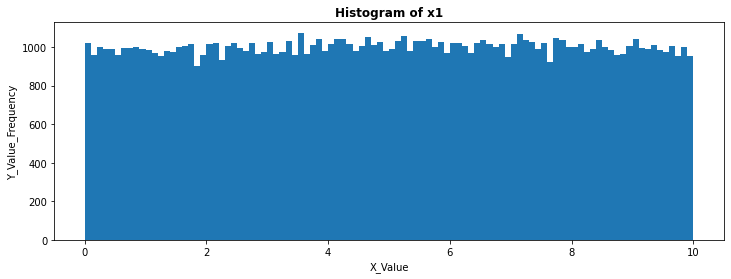

Fitting 8 distributions: 100%|██████████| 8/8 [00:15<00:00,  1.91s/it]


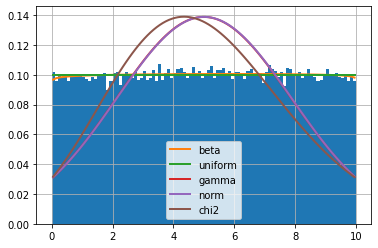

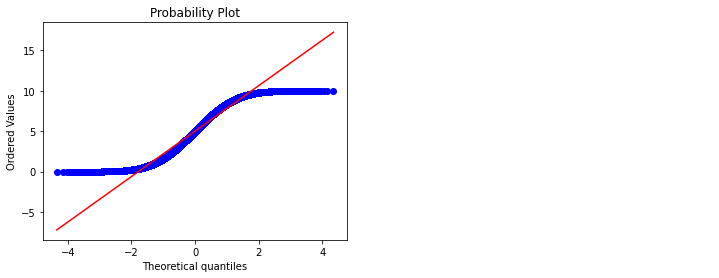

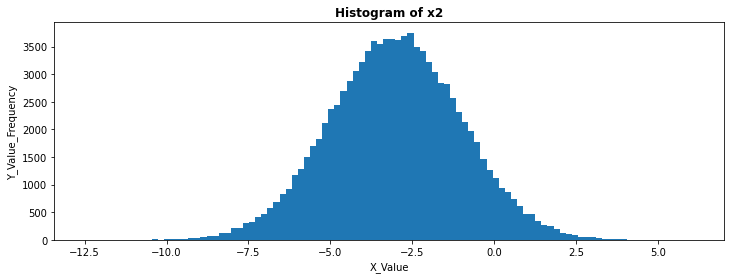

Fitting 8 distributions: 100%|██████████| 8/8 [00:10<00:00,  1.32s/it]


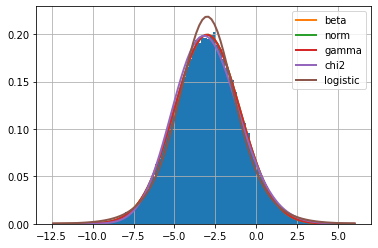

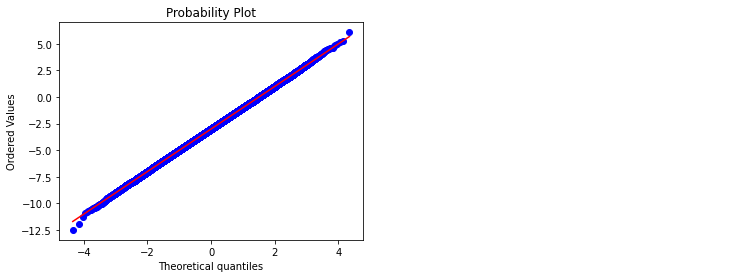

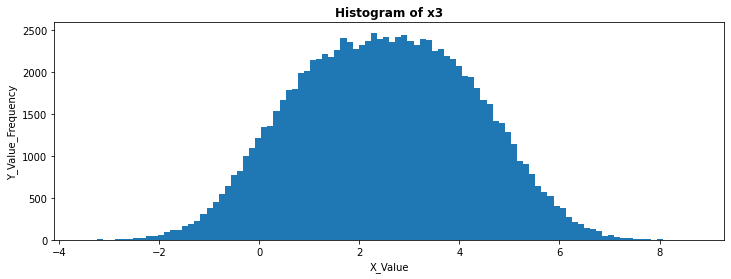

Fitting 8 distributions: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


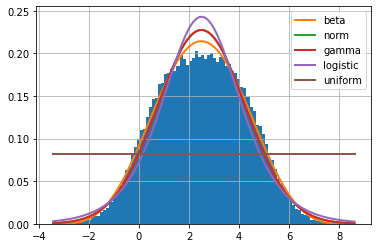

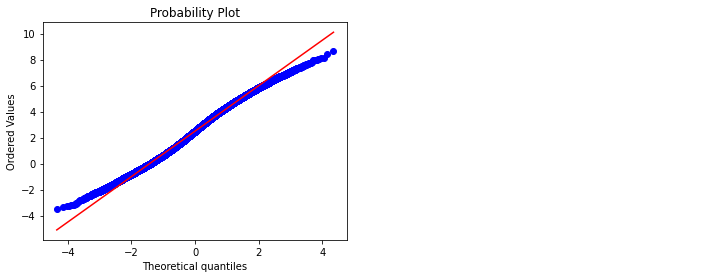

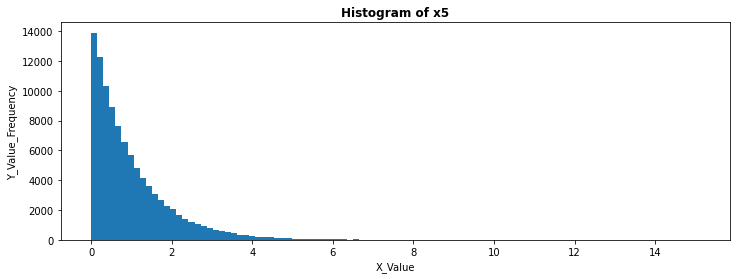

Fitting 8 distributions: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]


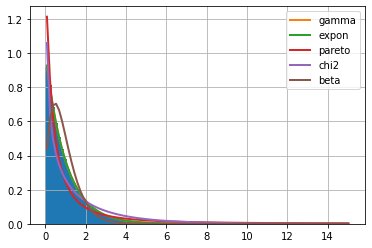

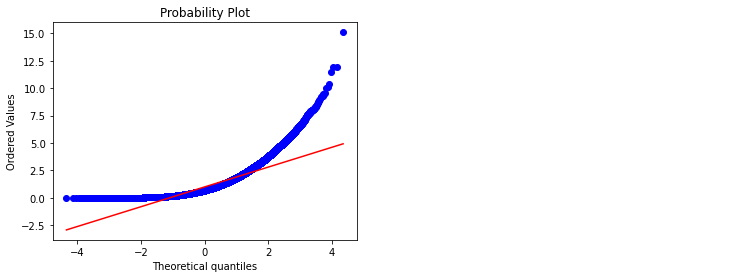

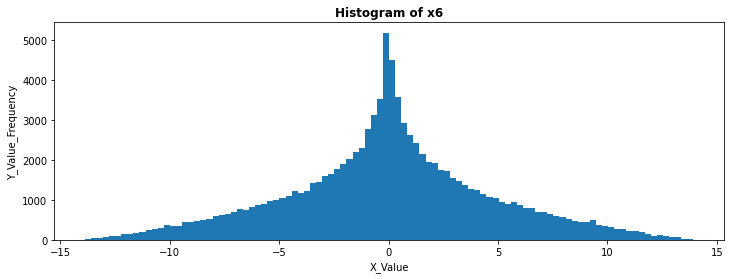

Fitting 8 distributions: 100%|██████████| 8/8 [00:13<00:00,  1.65s/it]


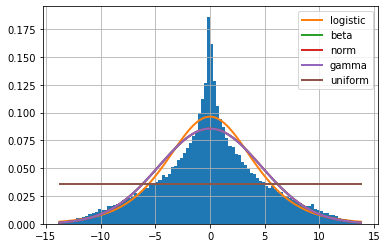

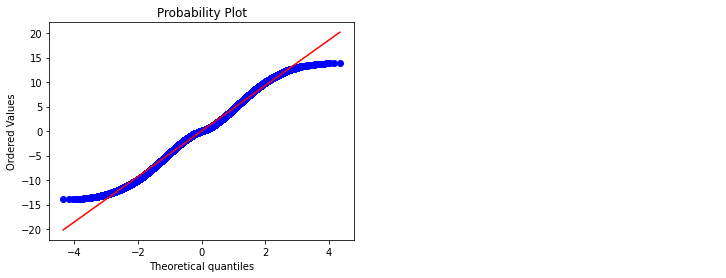

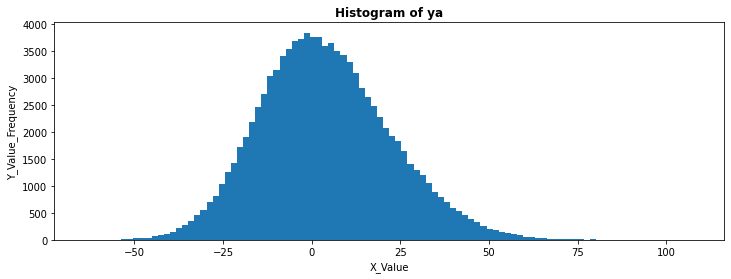

Fitting 8 distributions: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


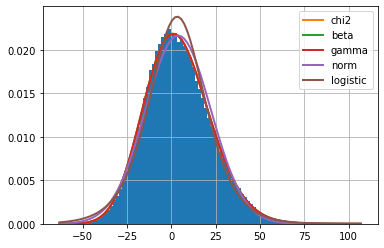

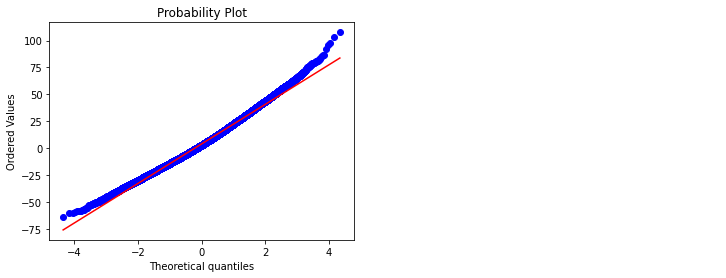

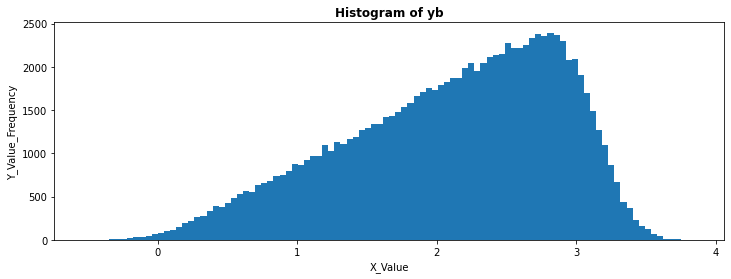

Fitting 8 distributions: 100%|██████████| 8/8 [00:16<00:00,  2.11s/it]


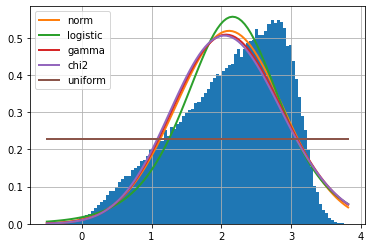

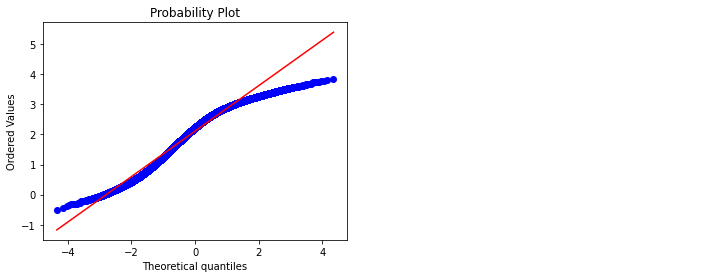

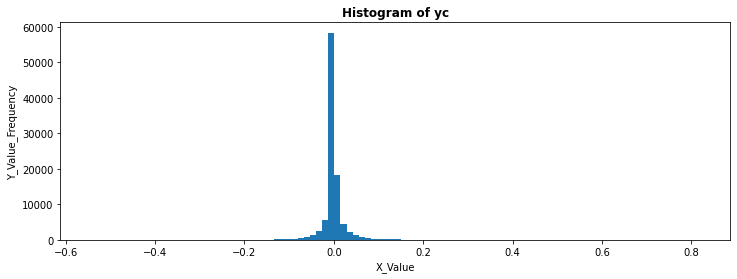

Fitting 8 distributions: 100%|██████████| 8/8 [00:14<00:00,  1.76s/it]


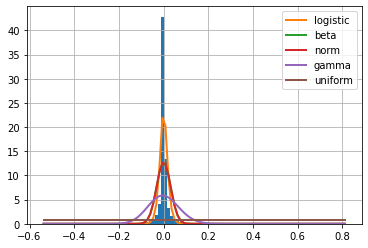

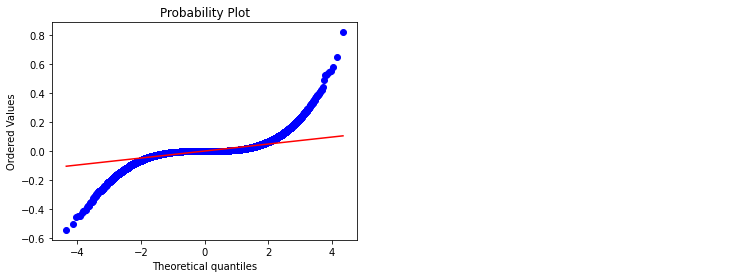

In [42]:
for i in df1.columns:
    distribution_visualizer_and_fitter(df1, i)

In [44]:
ninety_quantile = df1['x1'].quantile(0.9)
df2 = df1[df1['x1'] <= ninety_quantile]

In [45]:
from yellowbrick.cluster import SilhouetteVisualizer

In [46]:
def silhouettePlot(range_, data):
    half_length = int(len(range_)/2)
    range_list = list(range_)
    fig, ax = plt.subplots(half_length, 2, figsize=(15,8))
    for _ in range_:
        kmeans = KMeans(n_clusters=_, random_state=42)
        q, mod = divmod(_ - range_list[0], 2)
        sv = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q][mod])
        ax[q][mod].set_title('Silhouette Plot with n={} Cluster'.format(_))
        sv.fit(data)
    fig.tight_layout()
    fig.show()

In [47]:
def elbowPlot(range_, data, figsize=(10,10)):
    inertia_list = []
    for n in range_:
        kmeans= KMeans(n_clusters=n, random_state=42)
        kmeans.fit(data)
        inertia_list.append(kmeans.inertia_)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    sns.lineplot(y= inertia_list, x=range_, ax=ax)
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Inertia")
    ax.set_xticks(list(range_))
    fig.show()

In [48]:
def findOptimalEps(n_neighbors, data):
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sor(distances, axis = 0)
    distances = distances[:,1]
    plt.plot(distances)

In [49]:
def progressiveFeatureSelection(df2, n_clusters=3, max_features=4,):
    feature_list = list(df.columns)
    selected_features = list()
    initial_feature = ""
    high_score = 0
    for feature in feature_list:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        data_ = df[feature]
        labels = kmeans.fit_predict(data_.to_frame())
        score_ = silhouette_score(data_.to_frame(), labels)
        print("Proposed new feature {} with score {}". format(feature, score_))
        if score_ >= high_score:
            initial_feature = feature
            high_score = score_
    print("The initial feature is {} with a silhouette score of {}.".format(initial_feature, high_score))
    feature_list.remove(initial_feature)
    selected_features.append(initial_feature)
    for _ in range(max_features-1):
        high_score = 0
        selected_feature = ""
        print("Starting selection {}...".format(_))
        for feature in feature_list:
            selection_ = selected_features.copy()
            selection_.append(feature)
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            data_ = df[selection_]
            labels = kmeans.fit_predict(data_)
            score_ = silhouette_score(data_, labels)
            print("Proposed new feature {} with score {}". format(feature, score_))
            if score_ > high_score:
                selected_feature = feature
                high_score = score_
        selected_features.append(selected_feature)
        feature_list.remove(selected_feature)
        print("Selected new feature {} with score {}". format(selected_feature, high_score))
    return selected_features

In [52]:
#reshaping error in attempts to run scaler/standardized code; unable to create elbowplot, silhouette plot, kmeans clustering algorithm 

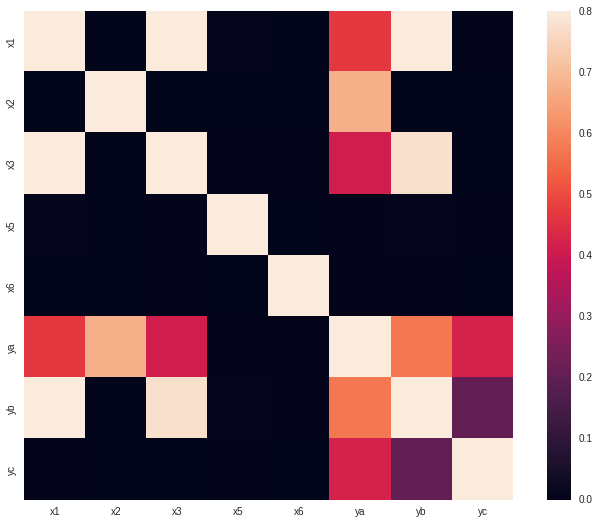

In [54]:
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

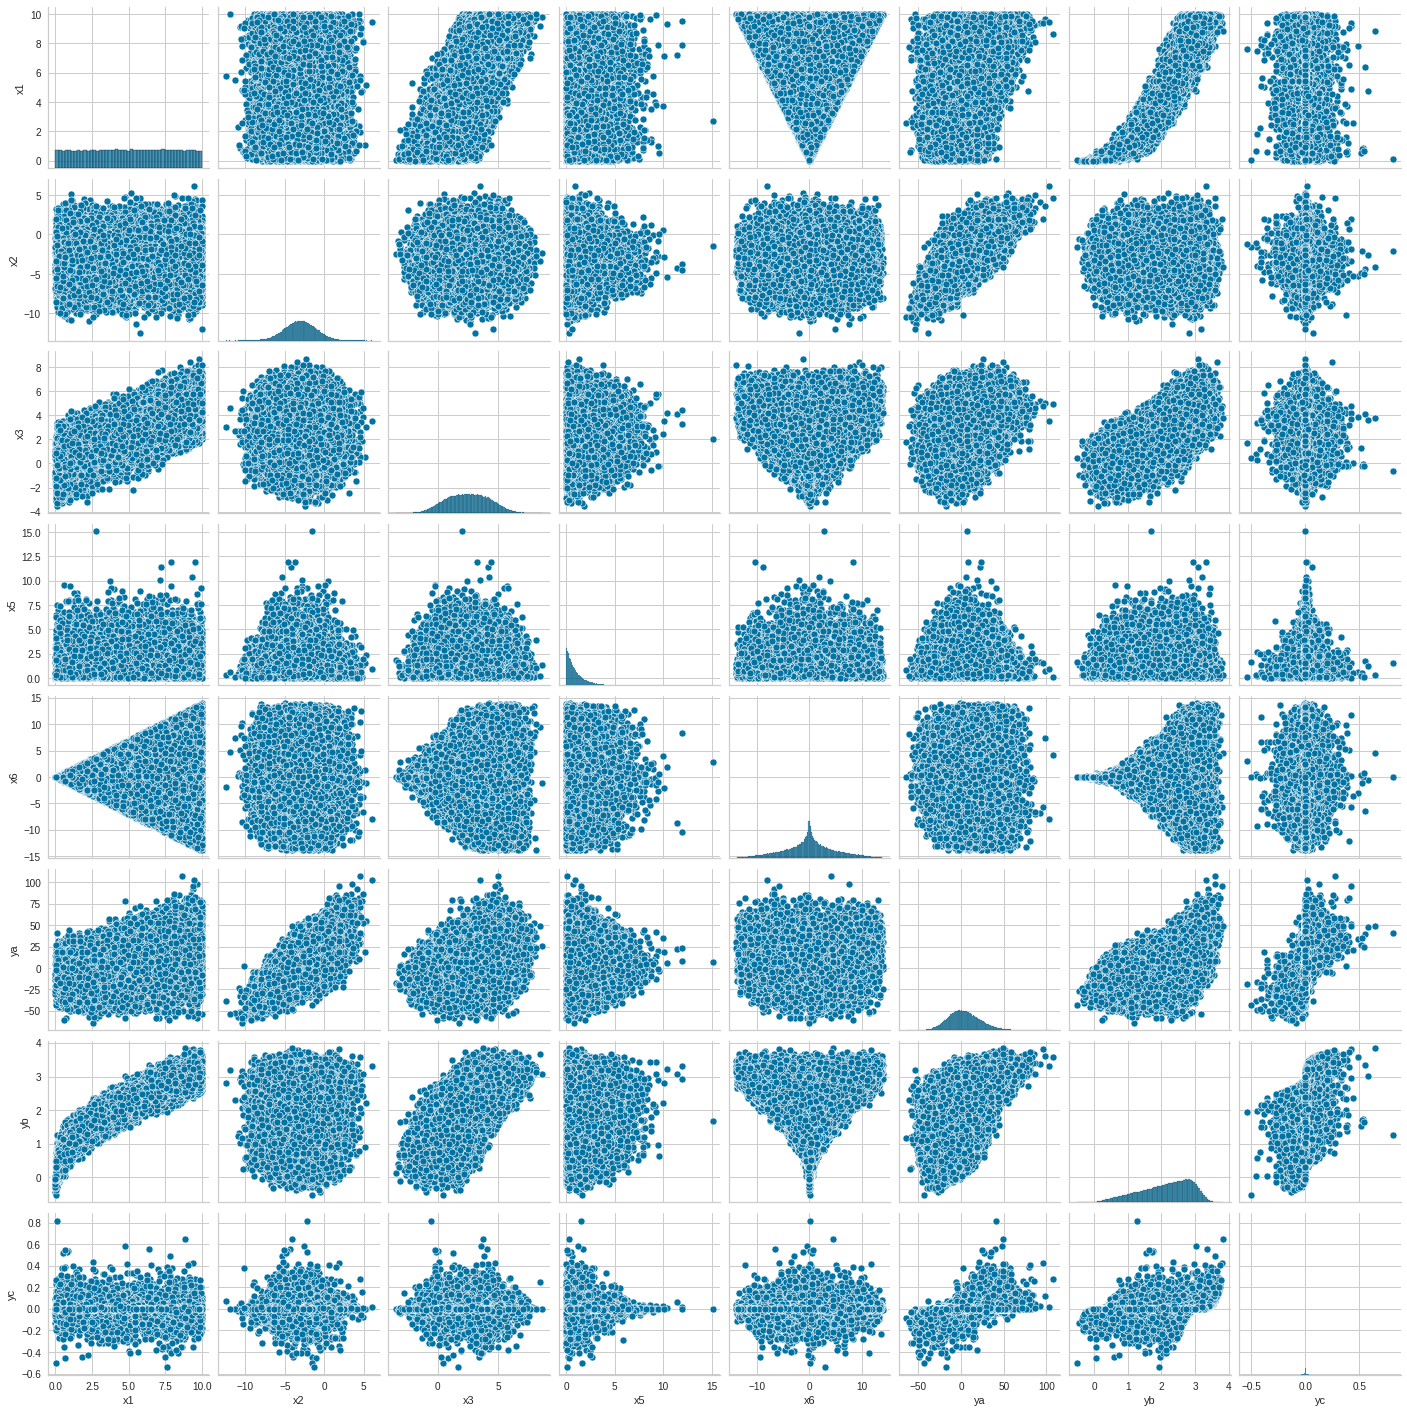

In [56]:
sns.pairplot(df1, height = 2.5)
plt.show()

In [57]:
import xgboost as xgb

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
from sklearn.metrics import r2_score

In [68]:
from sklearn.metrics import mean_absolute_error

In [70]:
from sklearn.metrics import median_absolute_error

In [72]:
from sklearn.model_selection import cross_val_score

In [58]:
features = df1[['x1','x2','x3','x5','x6']]
ya = df1['ya']
yb = df1['yb']
yc = df1['yc']

In [60]:
def xgboost_modeler(X, y, cv_folds_int, x_left, x_right, y_bottom, y_top):
    X_train_xgb, X_test, y_train_xgb, y_test = train_test_split\
    (X, y, test_size = 0.2, random_state = 1)
    xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
    xgb_model.fit(X_train_xgb,y_train_xgb)
    y_pred_xgb = xgb_model.predict(X_test)
    print("R^2:"+str(round(r2_score(y_test, y_pred_xgb),4)))
    print("Mean Absolute Error"+str(round(mean_absolute_error((y_test),\
                                                                               (y_pred_xgb)),2)))
    print("Median Absolute Error"+str(round(median_absolute_error((y_test),\
                                                                               (y_pred_xgb)),2)))
    print("STD of Training Data"+str(round(np.std((y_test)),2)))
    print("Mean of Training Data"+str(round(np.mean((y_test)),2)))
    print("Residual Skew: "+str(round(stats.skew((y_pred_xgb)-(y_test)),2)))
    print("Residual Kurtosis: "+str(round(stats.kurtosis((y_pred_xgb)-(y_test)),2)))
    fig, axs = plt.subplots(ncols=(3), nrows=(1), figsize=(15,4))
    plt.subplots_adjust(top = 0.95, bottom=0.01, hspace=0.4, wspace=0.16)
    axs[0].scatter((y_test), (y_pred_xgb))
    axs[0].set_title('X VS Y',fontweight = 'bold')
    axs[0].set_xlim([x_left, x_right])
    axs[0].set_ylim([y_bottom, y_top])
    axs[1].scatter((y_test), ((y_pred_xgb)-(y_test)))
    axs[1].set_title('X vs Y (pred - actual)',fontweight = 'bold')
    axs[1].set_xlim([x_left, x_right])
    axs[1].set_ylim([y_bottom, y_top])
    axs[2].hist(((y_pred_xgb)-(y_test)), bins=100)
    axs[2].set_title('Histogram of (predicted - actual)',fontweight = 'bold')
    plt.show()
    print("Cross-Validation Scoring for XGBoost")
    print('Mean Mean Absolute Error: {}'.format(-1*round(cross_val_score(xgb_model, X_train_xgb, y_train_xgb, \
                                                    cv=cv_folds_int, scoring='neg_mean_absolute_error').mean(),2)))
    print('Median Mean Absolute Error: {}'.format(-1*round(np.median(cross_val_score(xgb_model, X_train_xgb,\
                                                                                     y_train_xgb, \
                                                     cv=cv_folds_int, scoring='neg_mean_absolute_error')),2)))      
    print('Mean R^2: {}'.format(round(cross_val_score(xgb_model, X_train_xgb, y_train_xgb, cv=cv_folds_int,\
                                                      scoring='r2').mean(),3)))
    print('Median R^2: {}'.format(round(np.median(cross_val_score(xgb_model,\
                                             X_train_xgb, y_train_xgb, cv=cv_folds_int, scoring='r2')),3)))
    print('Max R^2: {}'.format(round(np.max(cross_val_score(xgb_model,\
                                             X_train_xgb, y_train_xgb, cv=cv_folds_int, scoring='r2')),3)))
    print('Min R^2: {}'.format(round(np.min(cross_val_score(xgb_model,\
                                             X_train_xgb, y_train_xgb, cv=cv_folds_int, scoring='r2')),3)))
    top_xgb_features = pd.DataFrame(sorted(list(zip(X,xgb_model.feature_importances_))\
       ,key = lambda x: abs(x[1]),reverse=True)[:10], columns=['Feature', 'XGBoost Importance'])
    top_xgb_features
    bar_count = range(len(top_xgb_features.Feature))
    fig, axs = plt.subplots(ncols=2, figsize=(14,4))
    axs[1].set_axis_off()
    axs[0].barh(bar_count, top_xgb_features['XGBoost Importance'][::-1],\
                 align='center', alpha=1)
    axs[0].set_xlabel('Values')
    axs[0].set_yticks(bar_count)
    axs[0].set_yticklabels(top_xgb_features.Feature[::-1], fontsize=10)
    axs[0].set_xlabel('XGBoost Importance')
    axs[0].set_title("XGBoost's Feature Importances",fontweight = 'bold')
    extent = axs[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    plt.show()

R^2:0.704
Mean Absolute Error7.99
Median Absolute Error6.79
STD of Training Data18.39
Mean of Training Data3.98
Residual Skew: -0.02
Residual Kurtosis: 0.03


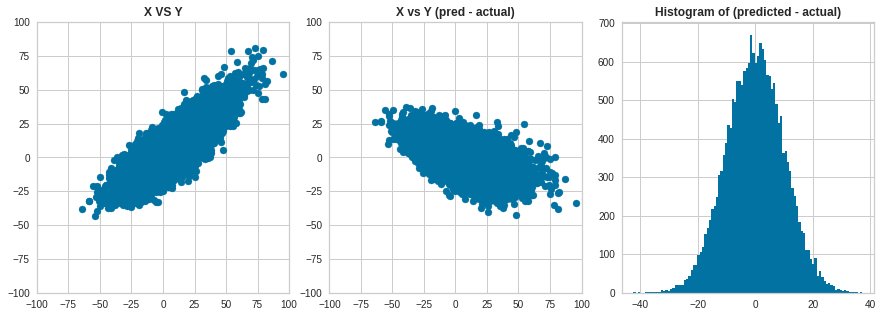

Cross-Validation Scoring for XGBoost
Mean Mean Absolute Error: 8.02
Median Mean Absolute Error: 8.03
Mean R^2: 0.703
Median R^2: 0.704
Max R^2: 0.707
Min R^2: 0.696


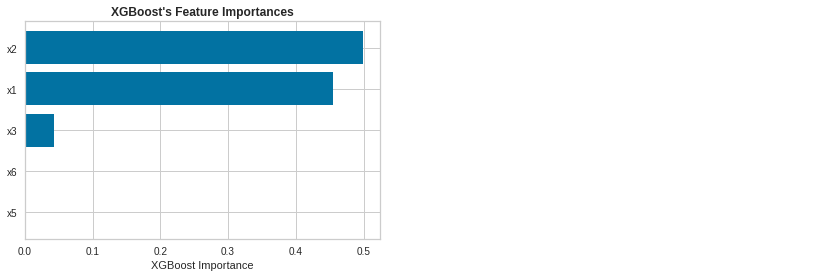

In [73]:
xgboost_modeler(X=features, y=ya, cv_folds_int=4, x_left=-100, x_right=100, y_bottom=-100, y_top=100)

In [97]:
import statsmodels.regression.linear_model as sm
from statsmodels.api import add_constant
from statsmodels.api import OLS
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [86]:
features_regression = add_constant(features)
regressor_OLS = sm.OLS(endog = ya, exog = features_regression).fit()
regressor_OLS.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ya   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                 4.190e+04
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:50:29   Log-Likelihood:            -3.7685e+05
No. Observations:              100000   AIC:                         7.537e+05
Df Residuals:                   99994   BIC:                         7.538e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5697      0.089     84.712      0.000       7.395       7.745
x1             2.5177      0.020    124.571      0.000       2.478       2.557
x2             6.2346      0.017    376.359      0.000       6.202       6.267
x3             0.9511      0.033     28.707      0.000       0.886       1.016
x5             0.0023      0.033      0.070      0.944      -0.063       0.067
x6             0.0041      0.007      0.581      0.561      -0.010       0.018
==============================================================================
Omnibus:                       41.538   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.505
Skew:                           0.039   Prob(JB):                     5.89e-10
Kurtosis:                       3.064   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2:0.9323
Mean Absolute Error0.16
Median Absolute Error0.14
STD of Training Data0.77
Mean of Training Data2.12
Residual Skew: -0.02
Residual Kurtosis: 0.03


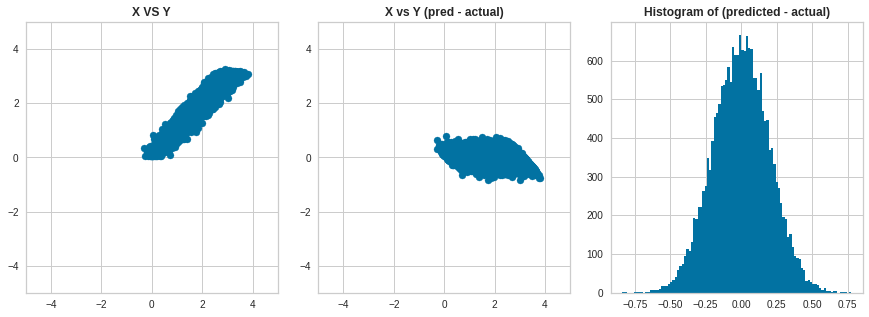

Cross-Validation Scoring for XGBoost
Mean Mean Absolute Error: 0.16
Median Mean Absolute Error: 0.16
Mean R^2: 0.932
Median R^2: 0.932
Max R^2: 0.933
Min R^2: 0.931


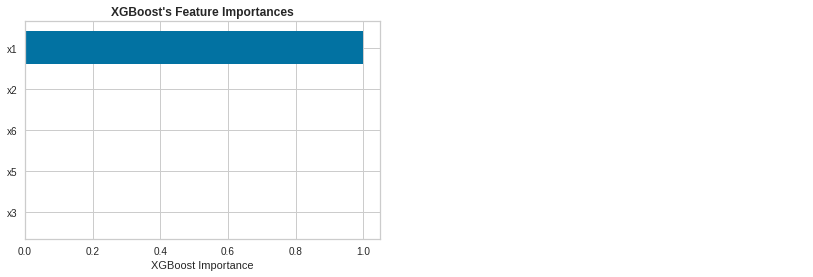

In [87]:
xgboost_modeler(X=features, y=yb, cv_folds_int=4, x_left=-5, x_right=5, y_bottom=-5, y_top=5)

In [88]:
features_regression = add_constant(features)
regressor_OLS = sm.OLS(endog = yb, exog = features_regression).fit()
regressor_OLS.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     yb   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.702e+05
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:53:21   Log-Likelihood:                -3038.6
No. Observations:              100000   AIC:                             6089.
Df Residuals:                   99994   BIC:                             6146.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8427      0.002    396.244      0.000       0.839       0.847
x1             0.2542      0.000    528.388      0.000       0.253       0.255
x2          6.148e-05      0.000      0.156      0.876      -0.001       0.001
x3            -0.0018      0.001     -2.279      0.023      -0.003      -0.000
x5             0.0003      0.001      0.353      0.724      -0.001       0.002
x6          7.677e-05      0.000      0.454      0.650      -0.000       0.000
==============================================================================
Omnibus:                     2347.227   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2710.565
Skew:                          -0.336   Prob(JB):                         0.00
Kurtosis:                       3.445   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
features_regression_x1 = add_constant(df1.x1)
regressor_OLS = sm.OLS(endog = yb, exog = features_regression_x1).fit()
regressor_OLS.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     yb   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 8.511e+05
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:53:47   Log-Likelihood:                -3041.4
No. Observations:              100000   AIC:                             6087.
Df Residuals:                   99998   BIC:                             6106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8428      0.002    531.489      0.000       0.840       0.846
x1             0.2533      0.000    922.571      0.000       0.253       0.254
==============================================================================
Omnibus:                     2346.712   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2709.981
Skew:                          -0.336   Prob(JB):                         0.00
Kurtosis:                       3.445   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2:-0.0013
Mean Absolute Error0.01
Median Absolute Error0.0
STD of Training Data0.03
Mean of Training Data0.0
Residual Skew: -0.7
Residual Kurtosis: 43.41


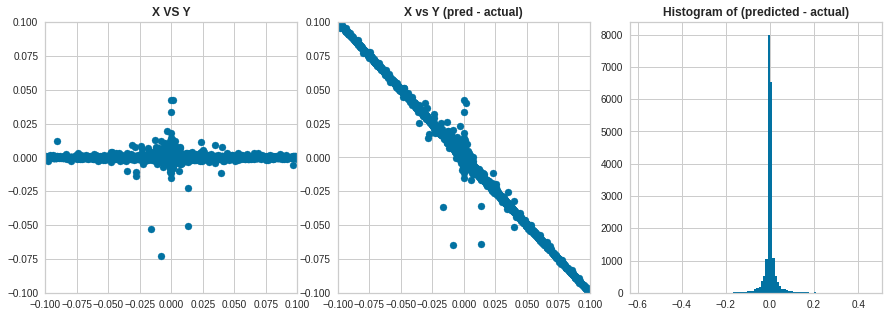

Cross-Validation Scoring for XGBoost
Mean Mean Absolute Error: 0.01
Median Mean Absolute Error: 0.01
Mean R^2: -0.003
Median R^2: -0.003
Max R^2: -0.001
Min R^2: -0.006


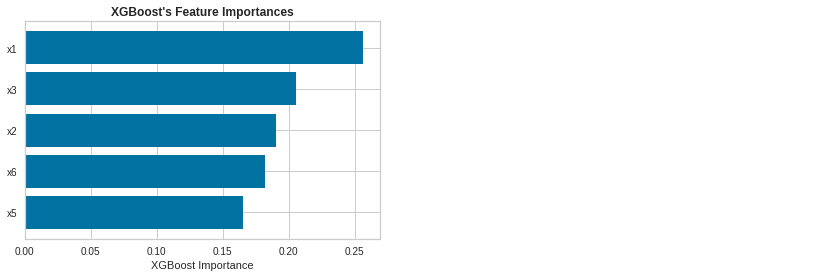

In [90]:
xgboost_modeler(X=features, y=yc, cv_folds_int=4, x_left=-0.1, x_right=0.1, y_bottom=-0.1, y_top=0.1)

In [91]:
features_regression = add_constant(features)
regressor_OLS = sm.OLS(endog = yc, exog = features_regression).fit()
regressor_OLS.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     yc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9993
Date:                Tue, 11 Oct 2022   Prob (F-statistic):              0.416
Time:                        19:55:49   Log-Likelihood:             2.0480e+05
No. Observations:              100000   AIC:                        -4.096e+05
Df Residuals:                   99994   BIC:                        -4.095e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.427      0.669      -0.001       0.000
x1             0.0001   6.02e-05      2.008      0.045    2.87e-06       0.000
x2          7.659e-06   4.93e-05      0.155      0.877    -8.9e-05       0.000
x3            -0.0002   9.87e-05     -1.844      0.065      -0.000    1.14e-05
x5          8.846e-05   9.85e-05      0.898      0.369      -0.000       0.000
x6         -9.798e-07   2.12e-05     -0.046      0.963   -4.25e-05    4.05e-05
==============================================================================
Omnibus:                    38901.894   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8034394.166
Skew:                           0.721   Prob(JB):                         0.00
Kurtosis:                      46.888   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
def multiple_linear_regression_modeler(X, y, cv_folds_int, x_left, x_right, y_bottom, y_top):
    X_train1, X_test, y_train1, y_test = train_test_split\
    (X, y, test_size = 0.2, random_state = 1)
    model = LinearRegression()
    model.fit(X_train1,y_train1)
    y_slr_predict = model.predict(X_test)
    print("R^2:"+str(round(r2_score(y_test, y_slr_predict),4)))
    print("Mean Absolute Error"+str(round(mean_absolute_error((y_test),\
                                                                               (y_slr_predict)),2)))
    print("STD of Training Data"+str(round(np.std((y_test)),2)))
    print("Mean of Training Data"+str(round(np.mean((y_test)),2)))
    print("Residual Skew: "+str(round(stats.skew((y_slr_predict)-(y_test)),2)))
    print("Residual Kurtosis: "+str(round(stats.kurtosis((y_slr_predict)-(y_test)),2)))
    fig, axs = plt.subplots(ncols=(3), nrows=(1), figsize=(15,4))
    plt.subplots_adjust(top = 0.95, bottom=0.01, hspace=0.25, wspace=0.16)
    axs[0].scatter((y_test), (y_slr_predict))
    axs[0].set_title('X Vs Y',fontweight = 'bold')
    axs[0].set_xlim([x_left, x_right])
    axs[0].set_ylim([y_bottom, y_top])
    axs[1].scatter((y_test), ((y_slr_predict)-(y_test)))
    axs[1].set_title('X vs Y (pred - actual)',fontweight = 'bold')
    axs[1].set_xlim([x_left, x_right])
    axs[1].set_ylim([y_bottom, y_top])
    axs[2].hist(((y_slr_predict)-(y_test)), bins=100)
    axs[2].set_title('Histogram of Residuals [predicted - actual]',fontweight = 'bold')
    plt.show()
    print("Cross-Validation Scoring for Standard Linear Regression")
    print('Mean Absolute Error: {}'.format(-1*round(cross_val_score(model, X_train1, y_train1, \
                                                 cv=cv_folds_int, scoring='neg_mean_absolute_error').mean(),2)))
    print('Median Mean Absolute Error: {}'.format(-1*round(np.median(cross_val_score(model, X_train1, y_train1, \
                                                 cv=cv_folds_int, scoring='neg_mean_absolute_error')),2)))  
    
    print('Mean R^2: {}'.format(round(cross_val_score(model, X_train1, y_train1, cv=cv_folds_int, \
                                                 scoring='r2').mean(),2)))
    print('Median R^2: {}'.format(round(np.median(cross_val_score(model,\
                                             X_train1, y_train1, cv=cv_folds_int, scoring='r2')),3)))
    print('Max R^2: {}'.format(round(np.max(cross_val_score(model,\
                                             X_train1, y_train1, cv=cv_folds_int, scoring='r2')),3)))
    print('Min R^2: {}'.format(round(np.min(cross_val_score(model,\
                                             X_train1, y_train1, cv=cv_folds_int, scoring='r2')),3)))
    linear_regression_feature_list = []
    linear_regression_coef_list = []
    for i in X.columns:
        linear_regression_feature_list.append(i)
    for i in range(len(model.coef_)):
        linear_regression_coef_list.append(model.coef_[i])
    top_10_linear_regression_features = pd.DataFrame(sorted(list(zip(linear_regression_feature_list,\
                                                                     linear_regression_coef_list))\
       ,key = lambda x: abs(x[1]),reverse=True)[:10], columns=['Feature', 'Linear Regression Coefficient'])
    top_10_linear_regression_features   
    print(top_10_linear_regression_features)
    print('Intercept: {}'.format(model.intercept_))

In [93]:
def single_linear_regression_modeler(X, single_feature_str, y, cv_folds_int, x_left, x_right, y_bottom, y_top):
    X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    model = LinearRegression()
    model.fit(X_train1,y_train1)
    y_slr_predict = model.predict(X_test)
    print("R^2:"+str(round(r2_score(y_test, y_slr_predict),4)))
    print("Mean Absolute Error"+str(round(mean_absolute_error((y_test),\
                                                                                   (y_slr_predict)),2)))
    print("STD of Training Data"+str(round(np.std((y_test)),2)))
    print("Mean of Training Data"+str(round(np.mean((y_test)),2)))
    print("Residual Skew: "+str(round(stats.skew((y_slr_predict)-(y_test)),2)))
    print("Residual Kurtosis: "+str(round(stats.kurtosis((y_slr_predict)-(y_test)),2)))
    fig, axs = plt.subplots(ncols=(3), nrows=(1), figsize=(15,4))
    plt.subplots_adjust(top = 0.95, bottom=0.01, hspace=0.25, wspace=0.16)
    axs[0].scatter((y_test), (y_slr_predict))
    axs[0].set_title('X VS Y',fontweight = 'bold')
    axs[0].set_xlim([x_left, x_right])
    axs[0].set_ylim([y_bottom, y_top])
    axs[1].scatter((y_test), ((y_slr_predict)-(y_test)))
    axs[1].set_title('X VS Y (pred- actual)',fontweight = 'bold')
    axs[1].set_xlim([x_left, x_right])
    axs[1].set_ylim([y_bottom, y_top])
    axs[2].hist(((y_slr_predict)-(y_test)), bins=100)
    axs[2].set_title('Histogram of Residuals [predicted - actual]',fontweight = 'bold')
    plt.show()
    print("Cross-Validation Scoring for Standard Linear Regression")
    print('Mean Absolute Error: {}'.format(-1*round(cross_val_score(model, X_train1, y_train1, \
                                                     cv=cv_folds_int, scoring='neg_mean_absolute_error').mean(),2)))
    print('Median Mean Absolute Error: {}'.format(-1*round(np.median(cross_val_score(model, X_train1, y_train1, \
                                                     cv=cv_folds_int, scoring='neg_mean_absolute_error')),2)))  

    print('Mean R^2: {}'.format(round(cross_val_score(model, X_train1, y_train1, cv=cv_folds_int, \
                                                     scoring='r2').mean(),2)))
    print('Median R^2: {}'.format(round(np.median(cross_val_score(model,\
                                                 X_train1, y_train1, cv=cv_folds_int, scoring='r2')),3)))
    print('Max R^2: {}'.format(round(np.max(cross_val_score(model,\
                                                 X_train1, y_train1, cv=cv_folds_int, scoring='r2')),3)))
    print('Min R^2: {}'.format(round(np.min(cross_val_score(model,\
                                                 X_train1, y_train1, cv=cv_folds_int, scoring='r2')),3)))
    linear_regression_feature_list = []
    linear_regression_coef_list = []
    for i in list([single_feature_str]):
        linear_regression_feature_list.append(i)
    for i in range(len(model.coef_)):
        linear_regression_coef_list.append(model.coef_[i])
        top_10_linear_regression_features = pd.DataFrame(sorted(list(zip(linear_regression_feature_list,\
                                                                         linear_regression_coef_list))\
           ,key = lambda x: abs(x[1]),reverse=True)[:10], columns=['Feature', 'Linear Regression Coefficient'])
    top_10_linear_regression_features   
    print(top_10_linear_regression_features)
    print('Intercept: {}'.format(model.intercept_))

R^2:0.6769
Mean Absolute Error8.33
STD of Training Data18.39
Mean of Training Data3.98
Residual Skew: -0.04
Residual Kurtosis: 0.1


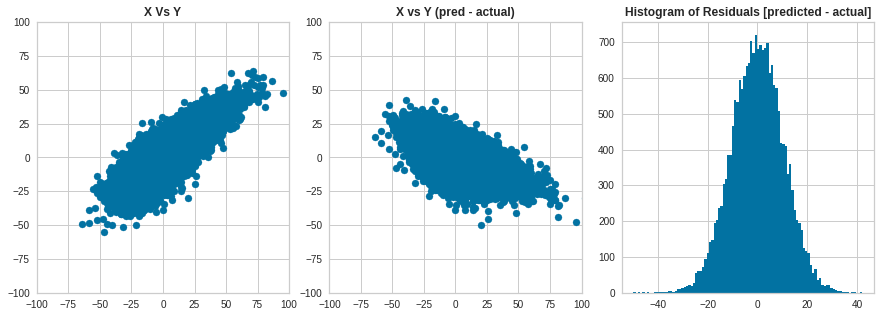

Cross-Validation Scoring for Standard Linear Regression
Mean Absolute Error: 8.36
Median Mean Absolute Error: 8.36
Mean R^2: 0.68
Median R^2: 0.677
Max R^2: 0.683
Min R^2: 0.671
  Feature  Linear Regression Coefficient
0      x2                       6.236009
1      x1                       2.513063
2      x3                       0.956032
Intercept: 7.5795255998256446


In [98]:
multiple_linear_regression_modeler(X=df1[['x1','x2','x3']], 
                        y=ya, cv_folds_int=4, x_left=-100, x_right=100, y_bottom=-100,y_top=100)

In [99]:
#ya = 2.51(x1) + 6.236(x2) + 0.956(x3) + 7.578

R^2:0.8965
Mean Absolute Error0.2
STD of Training Data0.77
Mean of Training Data2.12
Residual Skew: 0.32
Residual Kurtosis: 0.38


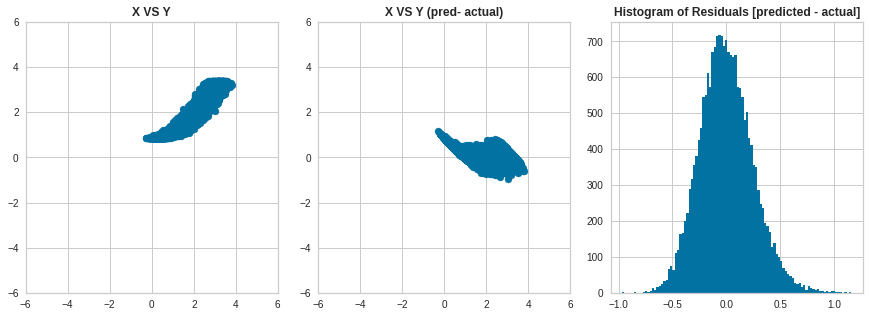

Cross-Validation Scoring for Standard Linear Regression
Mean Absolute Error: 0.2
Median Mean Absolute Error: 0.2
Mean R^2: 0.89
Median R^2: 0.894
Max R^2: 0.895
Min R^2: 0.894
  Feature  Linear Regression Coefficient
0      x1                        0.25334
Intercept: 0.8422290091647155


In [101]:
single_linear_regression_modeler(X=df1.x1.values.reshape(-1, 1), single_feature_str='x1',\
                                 y=yb, cv_folds_int=4, x_left=-6, x_right=6, y_bottom=-6, y_top=6)


In [ ]:
#yb = 0.253(x1) + 0.842

R^2:1.0
Mean Absolute Error0.0
STD of Training Data0.03
Mean of Training Data0.0
Residual Skew: -1.59
Residual Kurtosis: 3.6


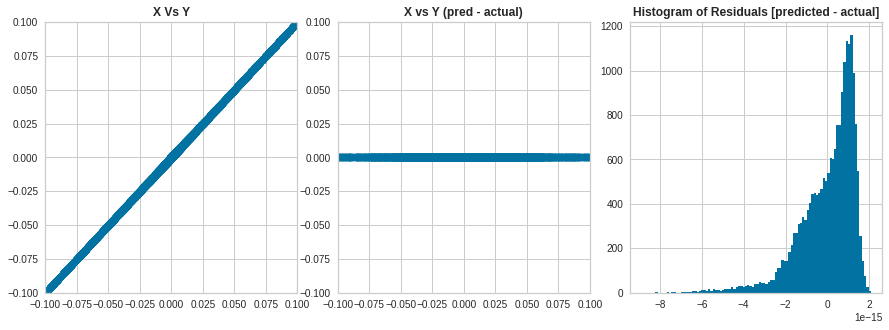

Cross-Validation Scoring for Standard Linear Regression
Mean Absolute Error: 0.0
Median Mean Absolute Error: 0.0
Mean R^2: 1.0
Median R^2: 1.0
Max R^2: 1.0
Min R^2: 1.0
  Feature  Linear Regression Coefficient
0      yc                   1.000000e+00
1      yb                   7.724001e-15
2      x1                  -1.654633e-15
3      x2                   8.342004e-16
4      x3                   1.834563e-16
5      ya                  -1.317695e-16
6      x5                  -9.367502e-17
7      x6                   5.623455e-18
Intercept: -5.3740649083589e-15


In [102]:
multiple_linear_regression_modeler(X=df1,y=yc, cv_folds_int=4, x_left=-0.1, x_right=0.1, y_bottom=-0.1, y_top=0.1)


In [103]:
#no eq

In [104]:
df3 = pd.read_csv('/ds2 (1).csv')
df3

Unnamed: 0         X1         X2         X3         X4         X5  \
0              1  23.778224  13.319974  15.565124  -3.713626   7.296793   
1              2  16.602950  23.311281  21.099052  -0.304154  -3.218990   
2              3  12.084683  19.710443   9.837102  -1.081918  -1.201942   
3              4  13.044534  10.749040   5.884407 -11.703525  -4.134358   
4              5   8.314115   6.748794   5.388535  -0.000290  -4.724787   
...          ...        ...        ...        ...        ...        ...   
1995        1996   7.938971  14.415032  10.410805   0.596848   0.754864   
1996        1997  12.296486   9.133867   6.703856   3.074668  -4.969635   
1997        1998   9.958681   2.660313  20.833856 -13.244253  19.291720   
1998        1999 -10.355833  15.105070  -5.705684   7.196082   0.849879   
1999        2000  16.033693  14.308373  12.222013  -9.343368  -2.822996   

             X6         X7         X8         X9        X10  
0    -19.371013  -0.894130  -6.110282 -28.959316   2.851336  
1      2.357643  12.027277   7.070349  -5.762185 -23.050198  
2      9.738019  16.125920  19.119391 -15.582122 -12.292535  
3    -22.344666  -1.263349   0.493711 -15.305347   6.799087  
4    -16.346812   3.293600 -10.848273 -17.285491   6.034214  
...         ...        ...        ...        ...        ...  
1995 -22.318668   1.326246  -5.919270 -14.141233   2.284455  
1996  19.249157  13.643448   8.458500 -18.058443 -22.983281  
1997  -9.732882  -3.350364   3.186218 -18.598822  20.423716  
1998  19.485150  11.989341  26.697433  -0.763111  -5.759242  
1999 -15.729261   6.376017  -6.680791 -14.146463  -2.226976  

[2000 rows x 11 columns]

In [105]:
df3 = df3.drop(columns=['Unnamed: 0'])
df3

X1         X2         X3         X4         X5         X6  \
0     23.778224  13.319974  15.565124  -3.713626   7.296793 -19.371013   
1     16.602950  23.311281  21.099052  -0.304154  -3.218990   2.357643   
2     12.084683  19.710443   9.837102  -1.081918  -1.201942   9.738019   
3     13.044534  10.749040   5.884407 -11.703525  -4.134358 -22.344666   
4      8.314115   6.748794   5.388535  -0.000290  -4.724787 -16.346812   
...         ...        ...        ...        ...        ...        ...   
1995   7.938971  14.415032  10.410805   0.596848   0.754864 -22.318668   
1996  12.296486   9.133867   6.703856   3.074668  -4.969635  19.249157   
1997   9.958681   2.660313  20.833856 -13.244253  19.291720  -9.732882   
1998 -10.355833  15.105070  -5.705684   7.196082   0.849879  19.485150   
1999  16.033693  14.308373  12.222013  -9.343368  -2.822996 -15.729261   

             X7         X8         X9        X10  
0     -0.894130  -6.110282 -28.959316   2.851336  
1     12.027277   7.070349  -5.762185 -23.050198  
2     16.125920  19.119391 -15.582122 -12.292535  
3     -1.263349   0.493711 -15.305347   6.799087  
4      3.293600 -10.848273 -17.285491   6.034214  
...         ...        ...        ...        ...  
1995   1.326246  -5.919270 -14.141233   2.284455  
1996  13.643448   8.458500 -18.058443 -22.983281  
1997  -3.350364   3.186218 -18.598822  20.423716  
1998  11.989341  26.697433  -0.763111  -5.759242  
1999   6.376017  -6.680791 -14.146463  -2.226976  

[2000 rows x 10 columns]

In [107]:
df3.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
dtype: int64

In [108]:
df3.describe()

X1           X2           X3           X4           X5  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      8.677829    11.716801     9.252817    -2.679634     2.774942   
std      11.971827     6.655333     9.861443    10.625164     8.800553   
min     -25.824199    -8.497562   -23.666439   -29.429655   -22.033329   
25%       0.231327     7.161564     2.648845   -10.652694    -4.098043   
50%      12.754335    11.896021    11.422441    -2.631318     2.484416   
75%      17.364337    16.279210    16.503676     5.340314     9.660898   
max      32.268570    32.909917    31.230550    26.422798    29.312010   

                X6           X7           X8           X9          X10  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean      0.077631     8.200884     8.712878   -12.860135    -1.339360  
std      15.375478    10.426023     9.881482     8.881026    14.534143  
min     -35.264019   -21.428538   -16.811146   -36.065150   -36.468083  
25%     -14.003670    -0.812888     1.480706   -19.430697   -13.216190  
50%       1.500838     8.532535     9.628064   -14.417786    -2.094310  
75%      14.050512    17.138898    16.081044    -6.534142    10.561797  
max      31.727042    32.084297    36.847922    13.553705    32.641789

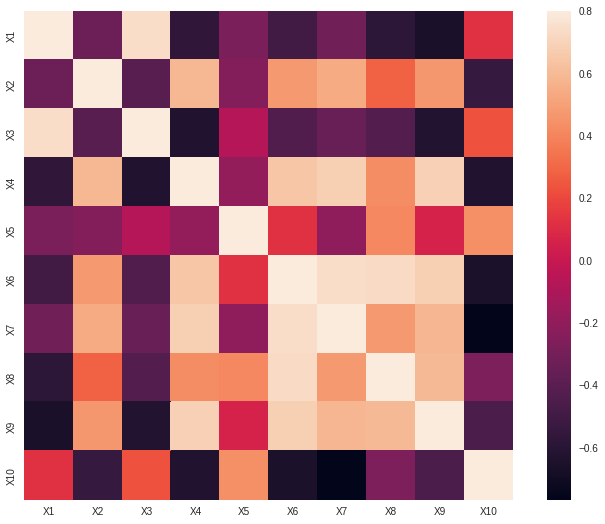

In [109]:
corrmat = df3.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


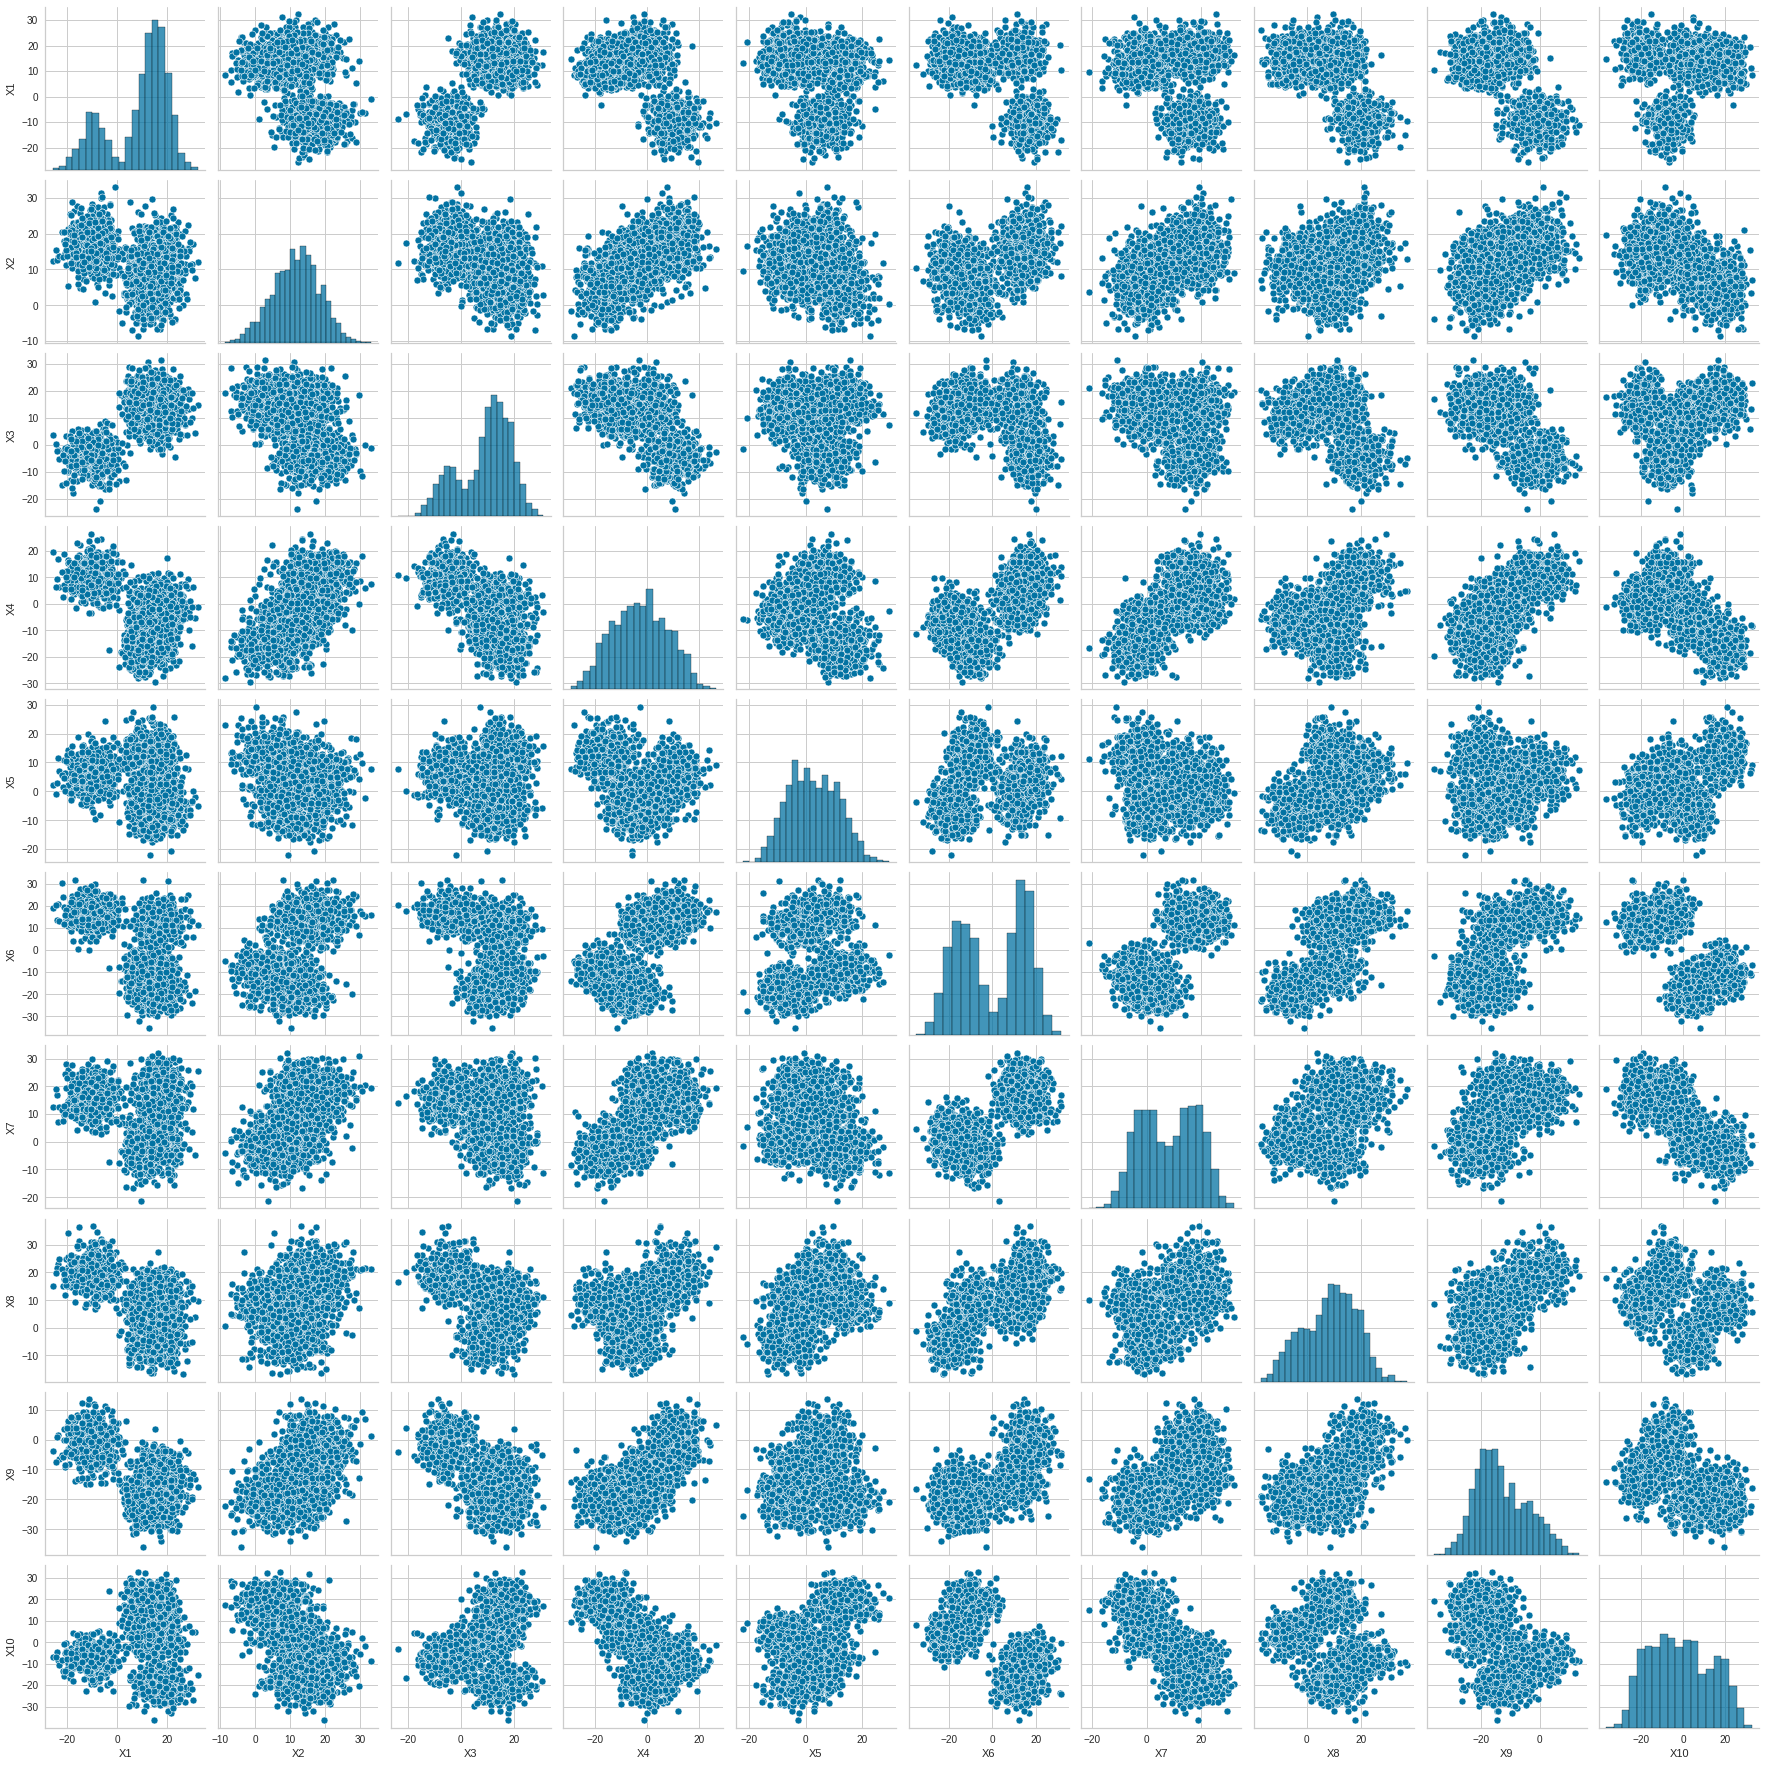

In [111]:
sns.pairplot(df3, size = 2.5)
plt.show()

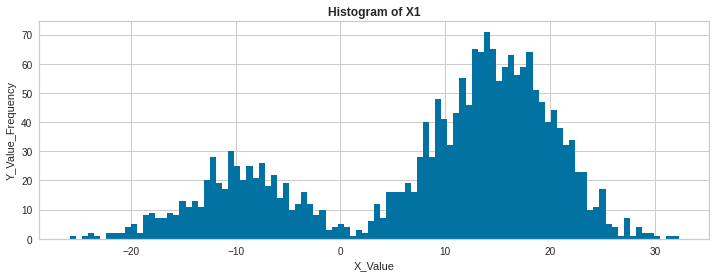

Fitting 8 distributions: 100%|██████████| 8/8 [00:01<00:00,  5.29it/s]


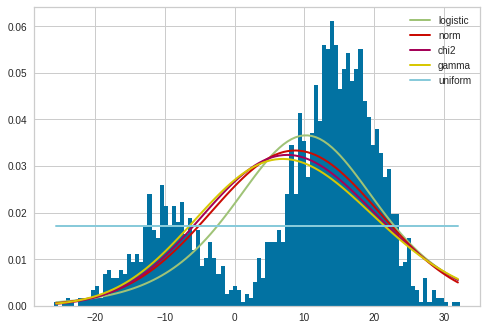

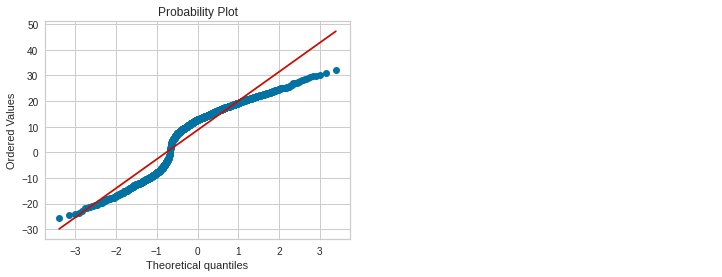

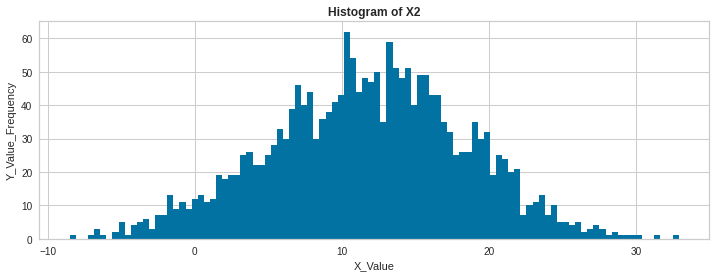

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00,  8.79it/s]


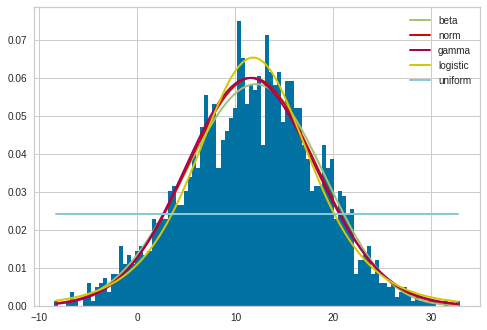

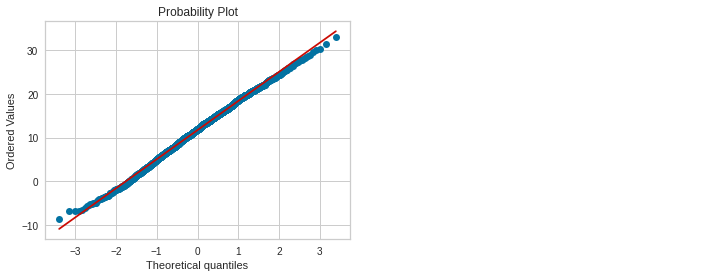

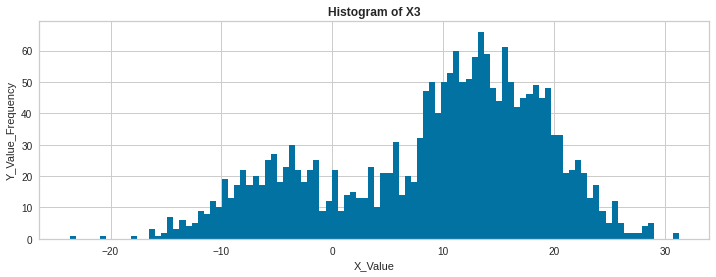

Fitting 8 distributions: 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]


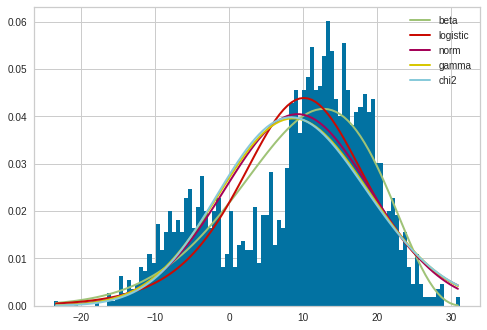

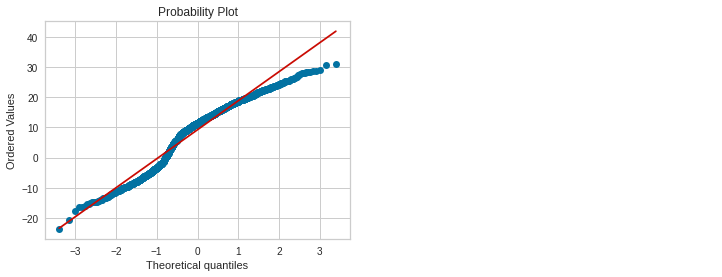

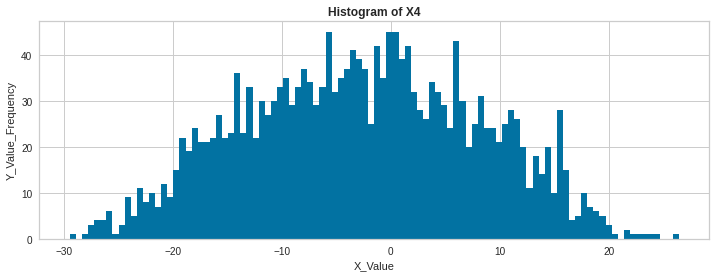

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 13.13it/s]


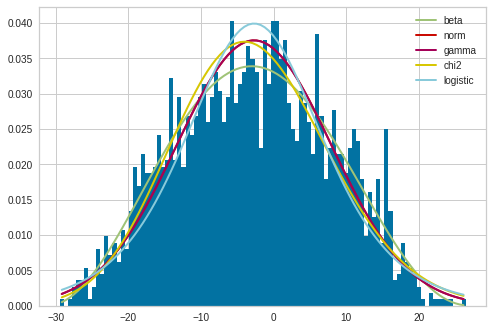

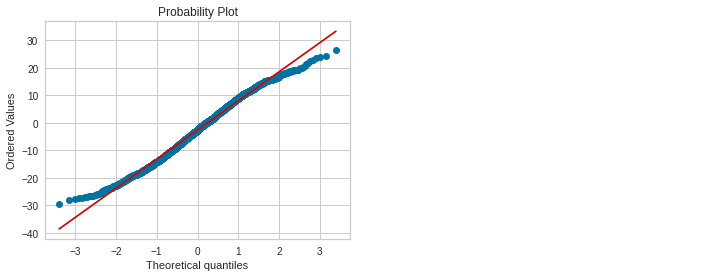

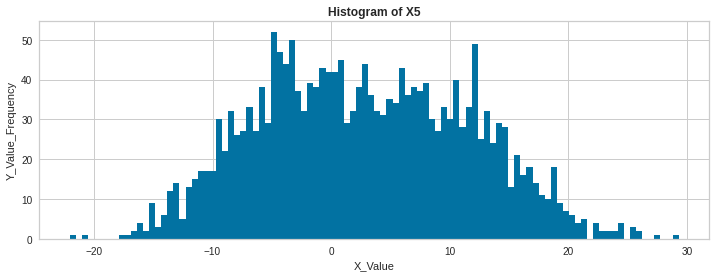

Fitting 8 distributions: 100%|██████████| 8/8 [00:01<00:00,  7.15it/s]


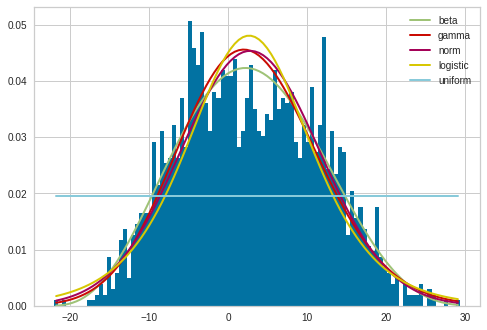

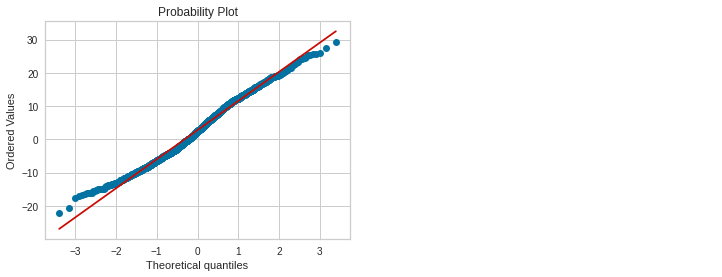

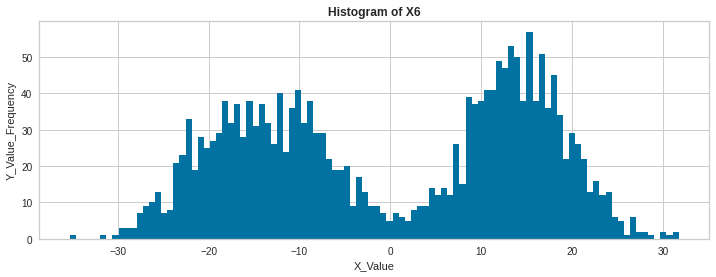

Fitting 8 distributions: 100%|██████████| 8/8 [00:01<00:00,  6.07it/s]


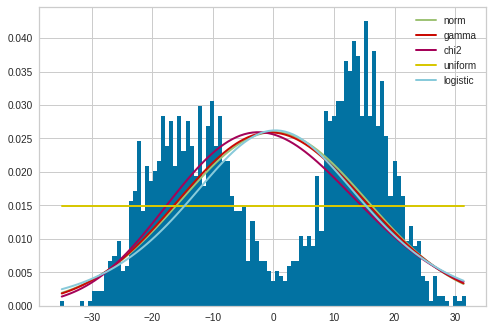

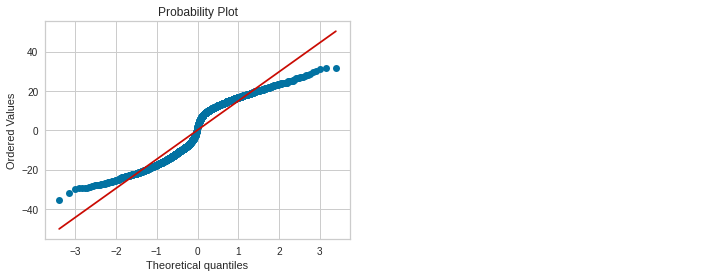

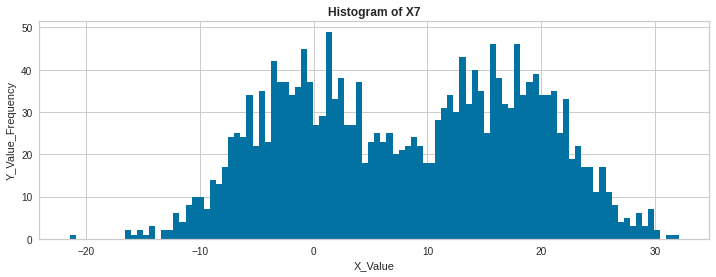

Fitting 8 distributions: 100%|██████████| 8/8 [00:01<00:00,  6.09it/s]


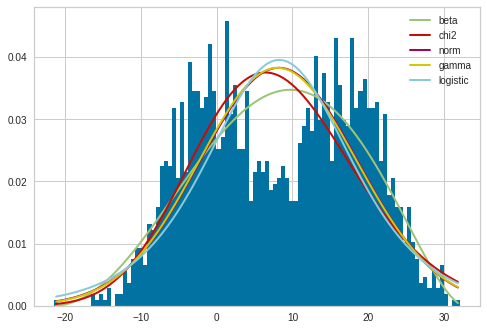

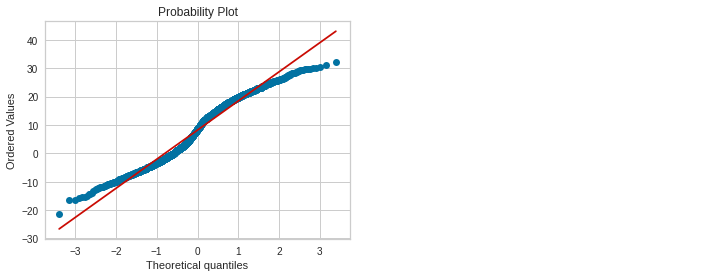

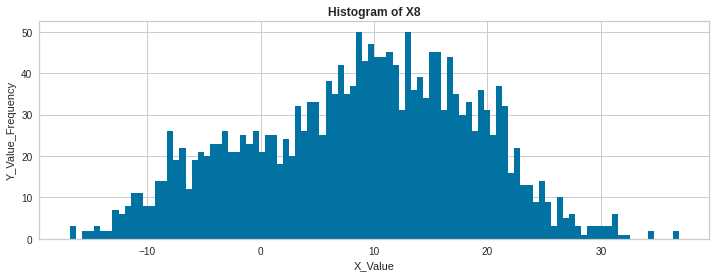

Fitting 8 distributions: 100%|██████████| 8/8 [00:01<00:00,  5.61it/s]


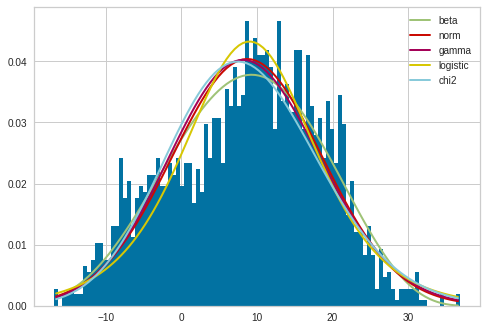

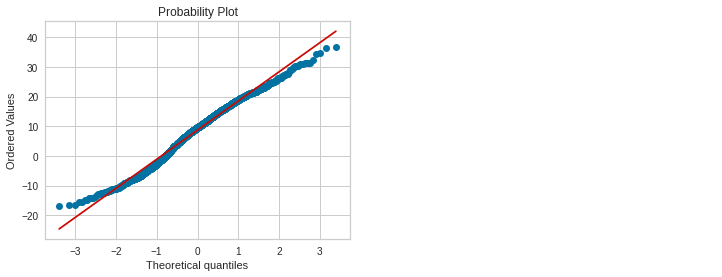

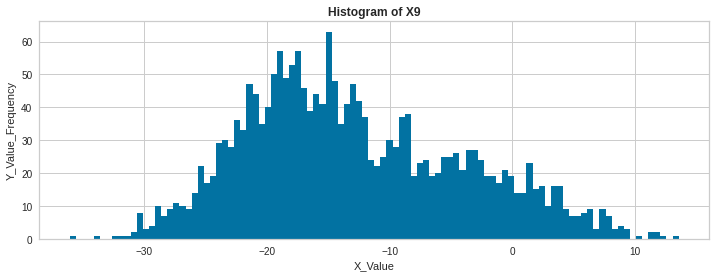

Fitting 8 distributions: 100%|██████████| 8/8 [00:01<00:00,  7.92it/s]


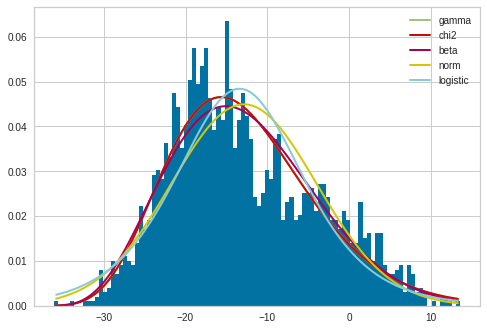

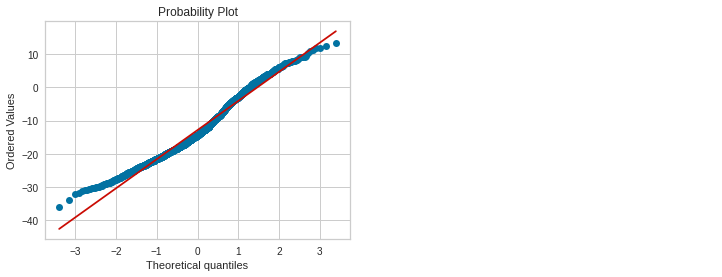

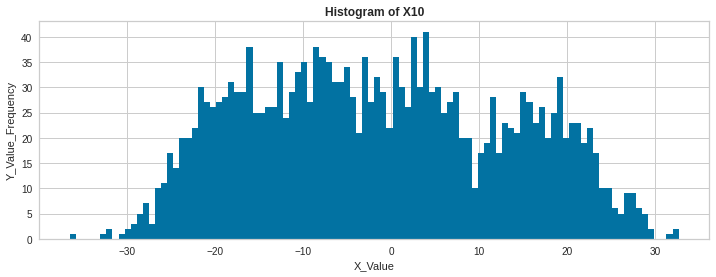

Fitting 8 distributions: 100%|██████████| 8/8 [00:01<00:00,  6.10it/s]


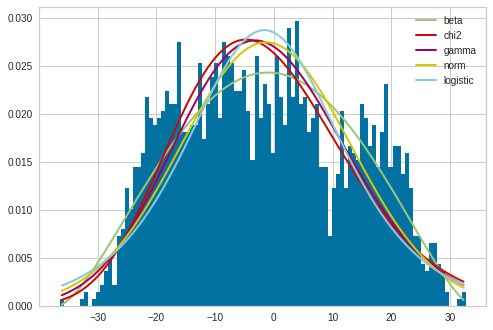

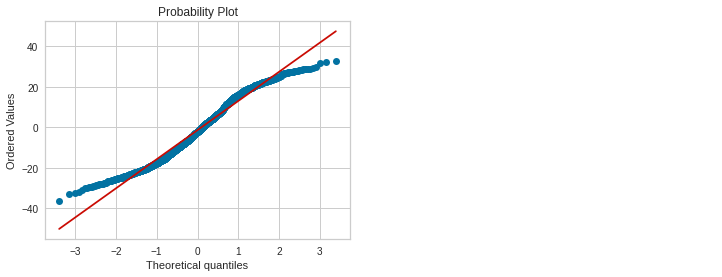

In [112]:
for i in df3.columns:
    distribution_visualizer_and_fitter(df3, i)

In [114]:
from sklearn.preprocessing import MinMaxScaler


In [115]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df3)

In [116]:
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

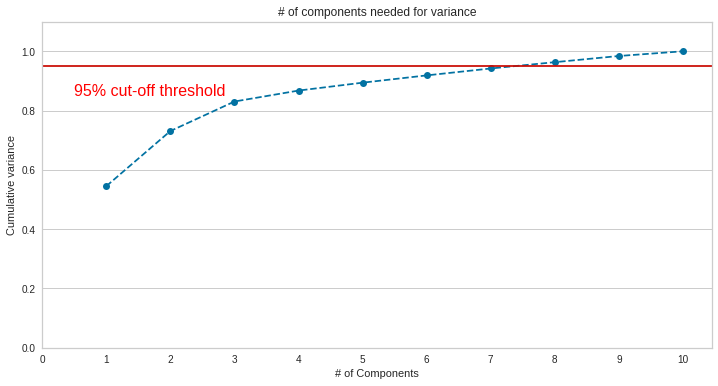

In [117]:
pca = PCA().fit(data_rescaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('# of Components')
plt.xticks(np.arange(0, 11, step=1))
plt.ylabel('Cumulative variance')
plt.title('# of components needed for variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [118]:
pca_execution = PCA(n_components=3)
pca_doing_its_work = pca_execution.fit_transform(data_rescaled)
print("original shape:   ", data_rescaled.shape)
print("transformed shape:", pca_doing_its_work.shape)

original shape:    (2000, 10)
transformed shape: (2000, 3)


In [119]:
pca_conjecture = pd.DataFrame(pca_doing_its_work, columns=['component_1','component_2', 'component_3'])


In [120]:
pca_conjecture.head()


component_1  component_2  component_3
0    -0.513079     0.150428     0.069967
1     0.164240     0.392656    -0.071182
2     0.243555     0.171085    -0.136090
3    -0.385704     0.017588     0.252501
4    -0.303847     0.083962     0.351603

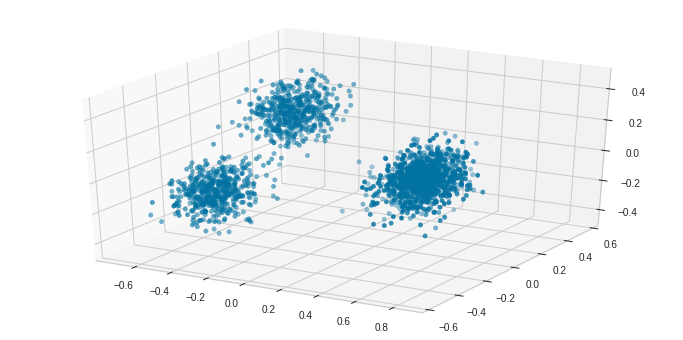

In [121]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(pca_conjecture.component_1, pca_conjecture.component_2, pca_conjecture.component_3)

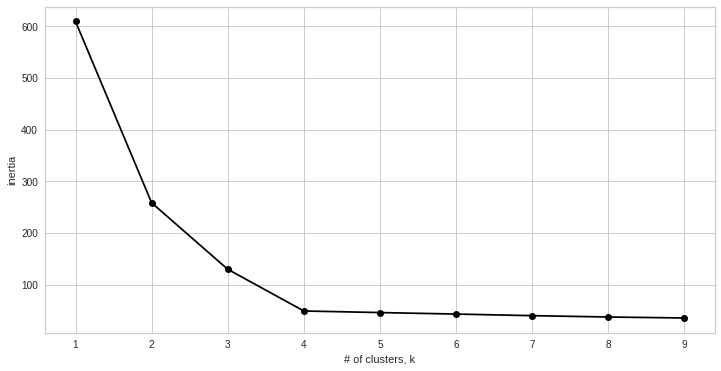

In [122]:
ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    
    model.fit(pca_conjecture)
    
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('# of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [123]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_conjecture)
choice_kmeans = kmeans.predict(pca_conjecture)

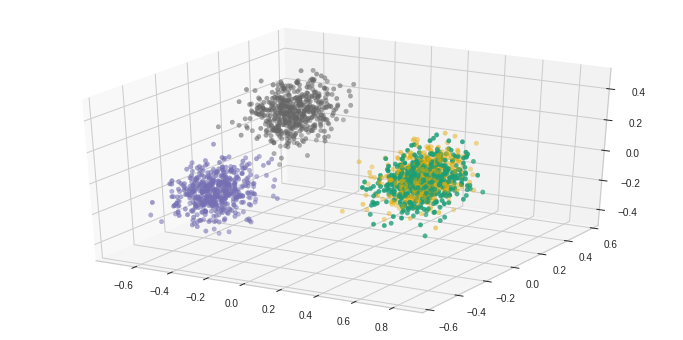

In [124]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(pca_conjecture.component_1, pca_conjecture.component_2, pca_conjecture.component_3,\
             c=choice_kmeans, cmap='Dark2')

In [127]:
df2['cohort_guess'] = choice_kmeans

ValueError: ignored

In [129]:
print(df2.shape)
print(choice_kmeans.shape)

(90000, 8)
(2000,)
